# 4장. NumPy 기초: 배열과 벡터 연산
NumPy는 Numerical Python의 줄임말로, 고성능 과학계산과 데이터분석의 기본 패키지이다. Numpy는 나중에 학습할 pandas, scipy, scikit-learn, tensorflow 등 고수준의 데이터분석 패키지의 basis가 된다.

NumPy가 제공하는 기능은 다음과 같다:
- 빠르고 메모리 효율적인 벡터 연산과 세련된 **브로드캐스팅** 기능을 제공하는 다차원 배열인 ndarray
- 반복문을 작성할 필요 없이 전체 데이터 배열에 대해 빠른 연산을 제공하는 표준 수학 함수
- 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 올려진 파일을 사용하는 도구
- 선형대수, 난수 발생기, 푸리에 변환 기능
- C, C++, 포트란으로 쓰여진 코드를 통합하는 도구

특히 마지막 기능으로 C API를 제공하여 저수준으로 씌여진 외부 라이브러리(c로 만들어진 openCV 등)를 쉽게 사용할 수 있도록 해준다.

NumPy는 고수준의 데이터분석 기능을 제공하지 않으나, 
- 데이터를 array라는 연속된 메모리 공간에 저장하고, 
- array라는 메모리 블럭 단위의 연산을 사용하도록 하여, 
- 큰 규모의 데이터 연산을 빠르게 수행할 수 있도록 해줄 뿐 아니라, 
- deep learning 이후 각광받고 있는 GPGPU를 통한 고속 연산 처리에 바로 적용할 수 있어, 
- python 계열의 데이터분석, 데이터저장, 머신러닝, AI 도구들이 공통적으로 활용하여
- 데이터 객체인 ndarray와 이 객체의 메소드를 확장하여(상속하여) 구현하고 있다.

따라서, 고수준의 여러 python 계열의 분석 도구를 활용하려면, 그 기반이 되는 NumPy를 정확하게 이해하고 있어야 제대로된 분석이 가능하다.

고수준의 여러 python 계열의 분석 도구들이 주요하게 사용하는 기능은:
- 벡터 배열상에서 데이터 개조, 정제, 부분 집합, 필터링, 변형, 다른 종류 연산의 빠른 수행 
- 정렬, 유일 원소 찾기, 집합연산 같은 일반적인 배열 처리 알고리즘
- 통계의 효과적인 표현과 데이터의 수집/요약
- 다른 종류의 데이터 묶음을 병합하고 엮기 위한 데이터 정렬과 데이터 간의 관계 조작
- if-elif-else를 포함하는 반복문 대신 사용할 수 있는 조건절을 표현할 수 있는 배열 표현            
- 데이터 그룹 전체에 적용할 수 있는 수집, 변형, 함수 적용 같은 데이터 처리.


In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

## 4.1 NumPy ndarray: 다차원 배열
ndarray의 의미는 n-dimensional array(다차원 배열)의 약자이다.

앞에서 설명했듯이 ndarray는 scala 원소 간의 연산과 유사한 방법으로 전체 data block을 for문과 같은 반복문 없이 한번에 연산할 수 있도록 해준다.

ndarray는 동일한 유형(dtype) 데이터를 연속된 메모리 공간에 담고 있으며
- 데이터의 차원을 나타내는 **shape**이라는 tuple 속성과
- 데이터의 유형을 나타내는 **dtype**이라는 속성을 갖는다.

numpy array의 특징/ 개념:
1. 동일한 데이터 타입으로 구성된다.
 - 모든 성분이 정수, 모든 성분이 실수, 모든 성분이 문자열 등...
 - 이 때문에 데이터 타입을 명시하는 dtype이라는 속성을 갖는다.
2. 메모리 상에 연속적으로 붙어있어, 한번에 연산처리가 가능하다.
 - for 문과 같은 loop를 거치지 않고, 한번에 연산하는 메소드들을 갖는다.
 - 행과 열 각각에 대한 점색인, 연속색인, 팬시색인을 제공한다.
3. 데이터의 모양(행과 열의 수 등)을 결정하는 shape을 갖는다.
 - shape는 속성으로 제공된다.
 - shape은 읽는 방식만 결정하지 실제 데이터는 메모리에서 행 방향으로 1차원으로 연속되어 있다. 
 - 따라서 동일한 크기를 갖는 다른 shape으로 변경이 가능하다.
 - 이때 메모리상의 배열 방식은 변경되지 않기 때문에 shape을 변경하더라도 동일한 array를 가르키게 된다.
  - 즉, shape을 바꾸더라도, 새로운 배열을 생성하는 것은 아니다.

In [ ]:
data = randn(2, 3)
data

array([[-1.3801, -0.5142,  0.7532],
       [ 0.3081,  1.5824, -0.412 ]])

메모리 상에서는 데이터가 행우선으로 1차원에 적재되어 있지만, 읽은 모양을 :
1. (2, 3)으로 읽을 수 도 있고, 
2. (3, 2)로도 읽을 수 있고, 
3. (6,)로도 읽을 수 있고, 
4. 1, 6)으로도 읽을 수 있다.

In [ ]:
data.reshape((6,))

array([-1.3801, -0.5142,  0.7532,  0.3081,  1.5824, -0.412 ])

randn(d0, d1, ..., dn):
- Return a sample (or samples) from the "standard normal" distribution.

(2, 3) array와 연산을 하려면, (1,1) (2, 1) (1, 3) (2, 3) (4, 3)

#### array의 연산
아래와 같이 broadcating을 통해 한번에 연산을 수행한다.

In [ ]:
data + [[1,2,3]]

array([[-0.3801,  1.4858,  3.7532],
       [ 1.3081,  3.5824,  2.588 ]])

반면 동일한 값을 가지고 있는 list에서는 두번의 for 문을 수행해야 같은 결과를 얻는다.

In [ ]:
l = data.tolist()
l

[[-1.3800884997126284, -0.5141806864010713, 0.7532088455578467],
 [0.30808525772180523, 1.5823753549910227, -0.41204788414720517]]

In [ ]:
for li in l:
    for i, k in zip(range(len(li)), [1,2,3]):
        li[i] += k
l

[[-0.38008849971262837, 1.4858193135989288, 3.7532088455578467],
 [1.3080852577218052, 3.5823753549910227, 2.587952115852795]]

스칼라 곱을 해주면:

In [ ]:
data * 10

array([[-13.8009,  -5.1418,   7.5321],
       [  3.0809,  15.8238,  -4.1205]])

In [ ]:
data + data

array([[-2.7602, -1.0284,  1.5064],
       [ 0.6162,  3.1648, -0.8241]])

In [ ]:
data*2

array([[-2.7602, -1.0284,  1.5064],
       [ 0.6162,  3.1648, -0.8241]])

In [ ]:
print(data.shape, data.size)
data.dtype

(2, 3) 6


dtype('float64')

#### array의 색인
referenced by https://numpy.org/doc/stable/user/basics.indexing.html

In [ ]:
arr = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr.shape, arr.dtype, arr.ndim

((2, 3), dtype('int32'), 2)

#### 점색인(poin indexing)
차원을 축소시킨다. 반면, 연속색인 size를 줄인지언정 차원은 유지한다.

In [ ]:
arr[1,2]

6

열 연속색인

In [ ]:
arr[1, 1:]

array([5, 6])

행 연속색인

In [ ]:
arr[0:, 2]

array([3, 6])

열행 연속색인

In [ ]:
arr[0:]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[0:, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[:, :]

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[0:][1:]

array([[4, 5, 6]])

In [ ]:
arr[1:]

array([[4, 5, 6]])

In [ ]:
arr[1:, :]

array([[4, 5, 6]])

In [ ]:
arr[1:, :].shape

(1, 3)

행에 대한 점색인, 열에 대한 연속색인

In [ ]:
arr[1]

array([4, 5, 6])

In [ ]:
arr[1, :]

array([4, 5, 6])

In [ ]:
arr[1].shape

(3,)

#### 열 팬시색인(fancy)
불연속색인

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[0, [0,2]]

array([1, 3])

행과 열 각각의 불연속색인은 pairwise point indexing

In [ ]:
arr[[0,1], [0,2]]

array([1, 6])

`arr[[i, j, k], [l, m, n]]` 색인을 취하면:
- `np.array([arr[i, l], arr[j, m], arr[k, n]])`

[Quiz] arr에서 [[1, 3], [4, 6]]을 취하고 싶으면 어떻게 해야 할까?
- 행의 색인은 다 취하고
- 열은 fancy 색인해주면 된다.

In [ ]:
arr[:,[0,2]]

array([[1, 3],
       [4, 6]])

https://numpy.org/doc/stable/reference/generated/numpy.ix_.html

In [ ]:
gridIdx = np.ix_([0,1], [0,2])
gridIdx

(array([[0],
        [1]]),
 array([[0, 2]]))

In [ ]:
arr[gridIdx]

array([[1, 3],
       [4, 6]])

[Quiz] 아래 ar에서 `[[12,11,14], [2,1,4]]`을 색인해보자.

In [ ]:
ar = np.arange(20).reshape((4,5))
ar

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

작전을 짜보자:
1. 먼저 2번째와 0번째 행. 즉 [2, 0] 행을 fancy 색인한다.
2. 순서대로 [2, 1, 4] 열을 fancy 색인한다.

In [ ]:
br = ar[[2,0]]
br

array([[10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4]])

In [ ]:
br[:,[2,1,4]]

array([[12, 11, 14],
       [ 2,  1,  4]])

chaining index 방법을 사용하면 복잡한 성분들도 쉽게 뽑아낼 수 있다.

In [ ]:
ar[[2,0]][:,[2,1,4]]

array([[12, 11, 14],
       [ 2,  1,  4]])

#### slicing에서 step과 turn을 사용하기

In [ ]:
li = list(range(10))
li

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
li[5:3:-1]

[5, 4]

In [ ]:
li[2:8]

[2, 3, 4, 5, 6, 7]

In [ ]:
li[2:8:2]

[2, 4, 6]

In [ ]:
li[8:2:-3]

[8, 5]

In [ ]:
import numpy as np
arr = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
oneDarr = np.array(range(6))
oneDarr

array([0, 1, 2, 3, 4, 5])

In [ ]:
oneDarr[2:5]

array([2, 3, 4])

In [ ]:
oneDarr[5:2:-2]

array([5, 3])

In [ ]:
# 끝에서 첫번째에서 끝에서 다섯번째까지 반대방향으로 2칸씩 건너뛰어서
oneDarr[-1:-5:-2]

array([5, 3])

#### 불리언 색인
최 외곽차원 즉, 행에 대한 색인만 가능

In [ ]:
arr.shape

(2, 3)

In [ ]:
bArr = [True, False]
arr[bArr].shape

(1, 3)

In [ ]:
arr[bArr]

array([[1, 2, 3]])

In [ ]:
arr[0].shape

(3,)

In [ ]:
# point indexing
arr[0]

array([1, 2, 3])

In [ ]:
# fancy indexing: a few point indexing
arr[[0]]

array([[1, 2, 3]])

[Quiz] arr에서 1, 5, 3의 값을 가져오는 색인을 해보자.

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[[0,1,0], [0,1,2]]

array([1, 5, 3])

[Quiz] arr에서 `[1,2,5,6]` 가져오는 색인을 해보자.

In [ ]:
arr[[0,0,1,1], [0,1,1,2]]

array([1, 2, 5, 6])

In [ ]:
arr.reshape((-1,))[[True, True, False, False, True, True]]

array([1, 2, 5, 6])

[Quiz] arr에서 `[[1,2], [5,6]]` 가져오는 색인을 해보자.
- hint: `arr.reshape((-1,))`

In [ ]:
arr.reshape((-1,))

array([1, 2, 3, 4, 5, 6])

In [ ]:
arr[[0,0,1,1], [0,1,1,2]].reshape((2,2))

array([[1, 2],
       [5, 6]])

In [ ]:
arr.reshape((-1,))[[True, True, False, False, True, True]].reshape((2,2))

array([[1, 2],
       [5, 6]])

In [ ]:
np.array([arr[0, :2], arr[1, 1:]])

array([[1, 2],
       [5, 6]])

bool indexing과 point, slicing, fancy와 같이 사용하기

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[0, [0,2]]

array([1, 3])

In [ ]:
arr[0, [True, False, True]]

array([1, 3])

In [ ]:
arr[0:1, [0,2]]

array([[1, 3]])

In [ ]:
arr[0:1, [True, False, True]]

array([[1, 3]])

In [ ]:
arr[[False, True], [1,0]]

array([5, 4])

In [ ]:
arr[[False, True], 2]

array([6])

In [ ]:
arr[[False, True], [True, False, True]]

array([4, 6])

### arr의 속성 변경
#### 1) shape의 변경 - View
shape을 변경하더라도 ndarray 객체는 변하지 않는다. 단지 array의 구조만 바뀔 뿐이다.

In [ ]:
ar = np.array([[1,2,3,4], [5,6,7,8]])
ar

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
ar2 = ar.reshape((4,2))
ar2

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

ndarray ar의 shape만을 변경한 ar2는 ar의 View일 뿐이므로, ar2 속성의 할당은 야래와 같이 ar을 변경하게 된다.

In [ ]:
ar2[0,0] = 10
ar

array([[10,  2,  3,  4],
       [ 5,  6,  7,  8]])

[Quiz] `ar3 = ar[0]; ar4 = ar[:,2]; ar5 = ar[[0,1], 1]` 일때 :
- `ar3[1] = 0; ar4[1] = 0; ar5[1] = 0` 어떤 결과가 나올까? 
- 왜 그런 결과가 나올까? 설명해보세요.

In [ ]:
ar

array([[10,  2,  3,  4],
       [ 5,  6,  7,  8]])

In [ ]:
ar3 = ar[0]; ar4 = ar[:,2]; ar5 = ar[[0,1], 1]
ar3, ar4, ar5

(array([10,  2,  3,  4]), array([3, 7]), array([2, 6]))

In [ ]:
ar3[1] = 0; ar4[1] = 0; ar5[1] = 0
ar, ar3, ar4, ar5

(array([[10,  0,  3,  4],
        [ 5,  6,  0,  8]]),
 array([10,  0,  3,  4]),
 array([3, 0]),
 array([2, 0]))

- 결과 해석: ar3, ar4는 ar의 View이고, ar5는 ar과 아무 관련없다.
- why: 행에 대한 점색인, 연속색인은 View를 보장하고, fancy 색인은 copy를 발생시킨다.
- 고려사항: 
 - View에 대한 변경은 원본을 훼손할 수 있다.
 - 어떤 것이 View이고 어떤것이 copy인 잘 모르겠으면, copy해서 사용해야 합니다.
 - 가급적 View를 사용하는 것이 좋다.

In [ ]:
ar6 = ar[0].copy()
ar6[1] = 100
ar, ar6

(array([[10,  0,  3,  4],
        [ 5,  6,  0,  8]]),
 array([ 10, 100,   3,   4]))

#### 2) dtype의 변경 - new object
ndarray ar의 dtype을 변경하면 새로운 ndarray 객체 arr3가 생성되며, 이 객체는 arr과 무관하다.

In [ ]:
ar3 = ar.astype('float')
ar3

array([[10.,  0.,  3.,  4.],
       [ 5.,  6.,  0.,  8.]])

dtype이 변경된 ar3는 ar과 다른 nparray를 참조하므로, ar3의 변경은 ar에 영향을 미치지 않는다.

In [ ]:
ar3[0,0] = 30
ar

array([[10,  0,  3,  4],
       [ 5,  6,  0,  8]])

In [ ]:
ar3

array([[30.,  0.,  3.,  4.],
       [ 5.,  6.,  0.,  8.]])

int형 array에 float를 대입하면, 소수부는 버린다.

In [ ]:
ar.dtype

dtype('int32')

In [ ]:
ar[0, 0] = 1.9
ar

array([[1, 0, 3, 4],
       [5, 6, 0, 8]])

### 4.1.1 Creating ndarrays
ndarray 객체를 생성하는 가장 쉬운 방법은 numpy.array 함수를 사용하는 것이다.

아래와 같은 명령어를 사용하여 np.array 함수를 이해하자.

>사실 np.array만 정확히 이해하면 NumPY를 절반은 배운 것이다!!

In [ ]:
np.array?

In [ ]:
np.array([1, 4, 0.0, 'a', [3,5]])

<ipython-input-83-54b3f03bf692>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([1, 4, 0.0, [3,5]])


array([1, 4, 0.0, list([3, 5])], dtype=object)

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
print (arr2.ndim)
print (arr2.shape)
print (arr2.shape[0])
print (arr2.dtype)

2
(2, 4)
2
int32


In [ ]:
print (np.zeros(10))
print ("=============")
print (np.zeros((3, 6)))
print ("=============")
print (np.empty((2, 3, 2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[1.26160130e-311 2.47032823e-322]
  [0.00000000e+000 0.00000000e+000]
  [0.00000000e+000 3.69776220e-062]]

 [[7.42620793e-091 9.90700707e+164]
  [6.55213839e-043 1.10542916e+165]
  [3.99910963e+252 4.93432906e+257]]]


In [ ]:
np.empty?

In [ ]:
list(range(15))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
np.arange(2.2, 12, .2)

array([ 2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8])

In [ ]:
np.arange?

In [ ]:
ar2

array([[1, 0],
       [3, 4],
       [5, 6],
       [0, 8]])

In [ ]:
np.zeros_like(ar2)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

#### ndarray를 생성하는 numpy 함수들
사용할 때는 `np.함수명`으로 사용하다. 

자료형이 명시 되지 않는 경우, 
- 많은 numpy tutorial에서는 보통 float64가 될 것이라 하지만, 
- numpy 구현체의 버전에 따라 일치하지 않는데, 
- numpy 최신버전에서는 제시된 자료형을 담을 수 있는 최소 size의 자료형으로 정해진다고 document에서는 명시한다.

<table align="left">
  <tr>
    <th>함수</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>array</td>
    <td>입력 데이터를 ndarray로 변환. dtype 미 지정시, 자료형에서 추론</td>
  </tr>
  <tr>
    <td>asarray</td>
    <td>입력 데이터를 ndarray로 변환. 입력 데이터가 ndarray일 경우 그대로 표시</td>
  </tr>
  <tr>
    <td>arange</td>
    <td>내장range 함수와 유사하지만 리스트 대신 ndarray를 반환</td>
  </tr>
  <tr>
    <td>ones</td>
    <td>주어진 dtype과 shape을 가지는 배열 생성. 성분을 모두 1로 초기화</td>
  </tr>
  <tr>
    <td>ones_like</td>
    <td>주어진 배열과 동일한 shape과 dtype을 갖는 배열을 생성. 1로 초기화</td>
  </tr>
  <tr>
    <td>zeros</td>
    <td> ones와 같지만 0으로 채운다</td>
  </tr>
  <tr>
    <td>zeros_like</td>
    <td> ones_like와 같지만 0dmfh codnsek</td>
  </tr>
  <tr>
    <td>empty</td>
    <td>  메모리를 할당하지만 초기화가 없음</td>
  </tr>
  <tr>
    <td>empty_like</td>
    <td> 메모리를 할당하지만 초기화가 없음</td>
  </tr>
  <tr>
    <td>eye(N,M,k=0)</td>
    <td>1, 0의 값을 갖는 대각 NxM 대각 행렬 생성. k에 따라 대각이 이동</td>
  </tr>
  <tr>
    <td>identity</td>
    <td> n x n 단위행렬 생성</td>
  </tr>
  <tr>
    <td>linspace</td>
    <td> start, stop, size를 설정하면 ndarray로 생성</td>
  </tr>
</table>

In [ ]:
np.arange(1., 2, .1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [ ]:
np.linspace(1., 2, 11)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

### 4.1.2 Data Types for ndarrays
자료형, dtype은 ndarray가 특정 데이터를 메모리에서 해석하기 위해 필요한 정보를 담고 있는 특수한 객체다.

산술 데이터의 dtype은:
- float, int 같은 자료형의 이름과 
- 하나의 원소가 차지하는 비트 수로 이루어진다.
- 예: float64 => 소수를 64bit 메모리 공간을 담는 data type.

<table align="left">
  <tr>
    <th>종류</th>
    <th> Type Code </th>
    <th> 설명</th>
  </tr>
  <tr>
    <td> int8, uint8</td>
    <td> i1, u1 </td>
    <td> 부호가 있는 8비트(1바이트) 정수형과 부호가 없는 8비트 정수형 </td>
  </tr>
  <tr>
    <td> int16, uint16</td>
    <td> i2, u2</td>
    <td> 부호가 있는 16비트 정수형과 부호가 없는 16비트 정수형</td>
  </tr>
  <tr>
    <td> int32, uint32</td>
    <td> i4, u4 </td>
    <td> ~ </td>
  </tr>
  <tr>
    <td> int64, uint64</td>
    <td> i8, u8 </td>
    <td> ~ </td>
  </tr>
  <tr>
    <td> float16</td>
    <td> f2  </td>
    <td> 반정밀도 부동소수점 </td>
  </tr>
  <tr>
    <td> float32</td>
    <td> f4 또는 f </td>
    <td> 단정밀도 부동소수점, C언어의 float과 호환 </td>
  </tr>
  <tr>
    <td> float64</td>
    <td> f8 또는 d</td>
    <td> 배정밀도 부동소수점, C언어의 double형과 파이썬 float객체와 호환 </td>
  </tr>
  <tr>
    <td> float128</td>
    <td> f16 또는 g </td>
    <td> 확장 정밀도 부동소수점 </td>
  </tr>
  <tr>
    <td> complex64/128/256,</td>
    <td> c8, c16, c32 </td>
    <td> 각각 2개의 32, 64, 128비트 부동소수점형을 가지는 복소수 </td>
  </tr>
  <tr>
    <td> bool </td>
    <td> ? </td>
    <td> True, False를 저장하는 불리언형 </td>
  </tr>
  <tr>
    <td> object </td>
    <td> 0 </td>
    <td> 파이썬 객체형 </td>
  </tr>
  <tr>
    <td> `string_`</td>
    <td> S </td>
    <td> 고정길이 문자열형(각 글자는 1바이트).<br> 길이가 10인 문자열의 dtype = S10 </td>
  </tr>
  <tr>
    <td> `unicode_`</td>
    <td> U </td>
    <td> 고정 길이 유니코드형(OS에 따라 글자별 바이트수 다름)<br> `string_`과 같은형식(ex) U10)</td>
  </tr>
</table>

In [ ]:
np.dtype?

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print (arr1.dtype)
print (arr2.dtype)

float64
int32


In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

dtype을 변경하려면 astype 메소드를 사용한다.
- astype 메소드를 사용하면 copy 연산이 같이 발생하면서 새로운 ndarray 객체가 생성된다.

In [ ]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

float dtype을 int dtype으로 변경하면, 소숫점 아래 자리는 버려진다.
- 좋은 방법이 아니다. 데이터의 정보가 왜곡된다. 이유는?
- 이와 유사한 것이 np.trunc(arr)인데, 정수부만 남은 소수를 반환한다.
- 이 방법 대신에 np.floor, np.ceil, np.rint를 사용하는 것이 적절하다.

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32) # 음수는 올림(ceil), 양수에서는 버림(floor)

array([ 3, -1, -2,  0, 12, 10])

In [ ]:
np.ceil(arr)

array([ 4., -1., -2.,  1., 13., 11.])

In [ ]:
np.floor(arr)

array([ 3., -2., -3.,  0., 12., 10.])

In [ ]:
np.round(arr)

array([ 4., -1., -3.,  0., 13., 10.])

In [ ]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [ ]:
np.modf(arr)

(array([ 0.7, -0.2, -0.6,  0.5,  0.9,  0.1]),
 array([ 3., -1., -2.,  0., 12., 10.]))

문자열이지만 숫자로 형변환이 가능한 경우 변환이 잘 이뤄지지만, 그렇지 않은 경우라면 TypeError가 발생한다.

In [ ]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print (numeric_strings.astype(float))
numeric_strings.astype(float).dtype

[ 1.25 -9.6  42.  ]


dtype('float64')

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

아래와 같이 dtype을 축약코드로 입력할 수 있다.
<table>
  <tr>
    <th>dtype 접두사</th>
    <th>설명</th>
    <th>사용 예</th>
  </tr>
  <tr>
    <td>t</td>
    <td>비트 필드</td>
    <td>t4 (4비트)</td>
  </tr>
  <tr>
    <td>b</td>
    <td>불리언</td>
    <td>b (참 혹은 거짓)</td>
  </tr>
  <tr>
    <td>i</td>
    <td>정수</td>
    <td>i8 (64비트)</td>
  </tr>
  <tr>
    <td>u</td>
    <td>부호 없는 정수</td>
    <td>u8 (64비트)</td>
  </tr>
  <tr>
    <td>f</td>
    <td>부동소수점</td>
    <td>f8 (64비트)</td>
  </tr>
  <tr>
    <td>c</td>
    <td>복소 부동소수점</td>
    <td>c16 (128비트)</td>
  </tr>
  <tr>
    <td>O</td>
    <td>객체</td>
    <td>0 (객체에 대한 포인터)</td>
  </tr>
  <tr>
    <td>S, a</td>
    <td>문자열</td>
    <td>S24 (24 글자)</td>
  </tr>
  <tr>
    <td>U</td>
    <td>유니코드 문자열</td>
    <td>U24 (24 유니코드 글자)</td>
  </tr>
  <tr>
    <td>V</td>
    <td>기타</td>
    <td>V12 (12바이트의 데이터 블럭)</td>
  </tr>
</table>

- 축약코드로 입력할 경우는 문자열 입력하듯 반듯이 인용기호를 사용한다.
- bit 코드 t를 제외한 나머지 코드에서 숫자는 byte 단위를 지정한다.

In [ ]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([2577576576,        594, 2577576816,        594, 2577577056,
              594, 2577577296,        594], dtype=uint32)

In [ ]:
empty_float32 = empty_uint32.astype('f4')
empty_float32

array([2.5775764e+09, 5.9400000e+02, 2.5775767e+09, 5.9400000e+02,
       2.5775770e+09, 5.9400000e+02, 2.5775772e+09, 5.9400000e+02],
      dtype=float32)

### 4.1.3 배열과 스칼라, 배열과 배열간의 연산
산술 연산 방식:
- shape이 같은 ndarray간에는 항목간(element-wise) 연산
- ndarray와 scalar간에는 scalar가 ndarray의 shape만큼 복사되어 연산
- shape이 다른 ndarray간에는 broadcast가 발생하지만, 실패할 수도 있다.

$$\begin{bmatrix}0 \\ 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} \overset{\text{numpy}}+ 1 = 
\begin{bmatrix}0 \\ 1 \\ 2 \\ 3 \\ 4 \end{bmatrix} +  \begin{bmatrix}1 \\ 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} = 
\begin{bmatrix}1 \\ 2 \\ 3 \\ 4 \\ 5 \end{bmatrix}$$

>broadcast는 ndarray와 scalar간 연산과 유사한 방식이다.
>- deep learning을 이해하기 위해서는 필수적인 내용이다.
>- 고차원에 대한 broadcasting은 간단히 아래 그림을 참조한다.
![](https://i.stack.imgur.com/JcKv1.png)

#### 1) 배열(ndarray)과 스칼라간의 연산

In [ ]:
np.arange(4).reshape((4,1))*10

array([[ 0],
       [10],
       [20],
       [30]])

In [ ]:
np.arange(3)

array([0, 1, 2])

In [ ]:
np.arange(4).reshape((4,1))*10 + np.arange(3)

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [ ]:
np.arange(3).reshape((1, 3))

array([[0, 1, 2]])

In [ ]:
np.arange(4).reshape((4,1))*10 + np.arange(3).reshape((1, 3))

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr + 1

array([[2., 3., 4.],
       [5., 6., 7.]])

In [ ]:
arr * 2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [ ]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [ ]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [ ]:
np.sqrt(arr)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

#### 2) 같은 shape의 배열간 연산(elemnet-wise operation)

In [ ]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [ ]:
arr **2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [ ]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

[Quiz] 아래를 numpy 연산으로 구현하자. 
```
[0, 1, 2, 3] -> 1로 나누고
[4, 5, 6, 7] -> 2로 나누고자한다.
```

In [ ]:
a1 = np.arange(8).reshape(2,4)
a1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
a2 = np.array([1,2])
a2

array([1, 2])

In [ ]:
print(a1.shape)
print(a2.shape)

(2, 4)
(2,)


In [ ]:
a2.reshape((-1,1))

array([[1],
       [2]])

In [ ]:
a1 / a2.reshape((-1,1))

array([[0. , 1. , 2. , 3. ],
       [2. , 2.5, 3. , 3.5]])

#### 3) (2, 4)와 (2, 1)의 broadcasting

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([[1.], [5.]])
arr1 + arr2

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.]])

(2, 4)와 (2, )의 broadcasting은 허용되지 않는다.

In [ ]:
arr1 + arr2

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.]])

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([1., 2.])
try: 
    arr1 + arr2
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (2,4) (2,) 


- 차원이 다른 경우, 하위 차원이 아래와 같이 일치하거나 둘 중 하나는 1이어야 한다.

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([1., 2., 3., 4.])
try: 
    print(arr1 + arr2)
except ValueError as e:
    print(e)

[[ 2.  4.  6.  8.]
 [ 6.  8. 10. 12.]]


#### 4) (2, 4)와 (1, 4)의 broadcasting

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([[1., 2., 3., 4.]])
arr1 + arr2

array([[ 2.,  4.,  6.,  8.],
       [ 6.,  8., 10., 12.]])

#### 5) (2, 4)와 (1, 2)의 broadcasting <font color='red'>not allowed</font>

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([[1., 5.]])
try: 
    arr1 + arr2
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,4) (1,2) 


In [ ]:
arr1 + arr2.reshape((2,1))

array([[ 2.,  3.,  4.,  5.],
       [10., 11., 12., 13.]])

#### 6) (2, 4)와 (1, 1)의 broadcasting

In [ ]:
arr1 = np.array([[1., 2., 3., 4.], [5., 6., 7., 8.]])
arr2 = np.array([[1.]])
arr1 + arr2

array([[2., 3., 4., 5.],
       [6., 7., 8., 9.]])

In [ ]:
arr1 + 1

array([[2., 3., 4., 5.],
       [6., 7., 8., 9.]])

In [ ]:
tmp = np.arange(60).reshape((3,4,5))
tmp

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [ ]:
tmp[1,0,0], tmp[0,1,2]

(20, 7)

어떤 array의 shape이 (n, m, n)이라 할 때:
- n은 0 axis의 size, m의 1 axis의 size, n은 2 axis 또는 -1 axis의 size.
- 전체 데이터의 수는 n x m x n이며 이를 arr의 size이다.
- 전체 데이터는 (n, m, n)의 우선순위를 가지면 메모리에 1차원으로 배열된다.

두 numpy array 간 연산의 broadcasting 원리:
1. -1 axis의 size가 서로 같아야 하거나,
2. 적어도 어느 한쪽의 size가 1이어야 한다.
3. 다시 -2 axis에서 위 1 또는 2의 조건을 만족해야 한다.
4. 3의 조건을 처음 축까지 반복한다.
5. 출력의 shape은 두 array의 각 축에서 큰 size를 따른다.

(예)
1. (2,4,5) + (4,5) = (2,4,5)
2. (2,1) + (1, 3) = (2,3)
3. (2,4,5) + (4,1) = (2,4,5)
4. (2,4,5) + (5,4) = 불가능 : (4,5)로 reshape하면 가능
5. (3,7,4) + (3,4) = 불가능 : (3,1,4)로 reshape하면 가능
6. (3,7,8) + (3,4,2) = 불가능: (3,1,8)로 reshape하면 가능

### 4.1.4 Basic indexing and slicing
색인을 통해 ndarray 객체 arr의 subset을 접근할 수 있는 여러가지 방법이 있다.
- 1차원 ndarray에 대한 색인 접근법은 list와 동일하다.

<u>광의의 색인 방법은 다음과 같이 여러가지가 존재하며, 아래와 같은 연산 특성을 갖는다.</u>

|구분|점색인(indexing)|연속색인(slicing)|불연속색인(fancy indexing)|
|---|---|---|---|
|**의미**|arr의 View|arr의 View|arr의 copy. 새 array 객체|
|**형식**|arr[i, j]|arr[i:, :j]|arr[[a,b,c], [d,e,f]]|
|**성분에 대한 대입**|arr[i, j]=v|arr[i:, :j][n,m]=v|arr[[a,b,c], [d,e,f]][n,m]=v|
||arr는 변경|arr는 변경|arr는 불변|
|**색인의 reference A**|A=arr[i, j]|A=arr[i:, :j]|A=arr[[a,b,c], [d,e,f]]|
||A just refer View|A just refer View|A is new Array|
|**referenc A의 할당**|A=v|A=v|A=v|
|A just refer another object|arr는 불변|arr는 불변|arr는 불변|

- 불연속(fancy) 색인은 일종의 bool 색인으로 간주할 수 있다.

#### 1) 점 색인(indexing)
차원 축소가 발생한다.

In [ ]:
arr = np.arange(10)
print (arr)

print("점 색인은 arr의 view")
print (arr[5])

arr[5] = 10
print (arr)

A = arr[5]
print(A)

print("A는 단지 새로운 int 객체 20을 가르킬 뿐이다.")
A = 20
print(A)

print("reference A에 대한 할당에 대해 arr은 불변")
print(arr)

[0 1 2 3 4 5 6 7 8 9]
점 색인은 arr의 view
5
[ 0  1  2  3  4 10  6  7  8  9]
10
A는 단지 새로운 int 객체 20을 가르킬 뿐이다.
20
reference A에 대한 할당에 대해 arr은 불변
[ 0  1  2  3  4 10  6  7  8  9]


#### 2) 연속색인(slicing)

역시 **slicing된 ndarray 객체**는 원본 arr의 **연속색인의 View**이다.
- 따라서 sub array가 변경되면 원본도 아래와 같이 변경된다.
- 이런 방법이 편리할 수도 있지만, 의도치 못한 문제가 발생할 수 있으니, 조심해야 한다.

대량의 데이터를 다루는 경우, slicing이 copy를 리턴한다면 이로 인한 메모리 부족이 발생할 수 있으므로, NumPy의 의도는 매우 긍정적이라 볼 수 있다.
- 나중에 확인하겠지만 pandas 객체의 slicing도 기본적으로 View를 제공한다.

In [ ]:
arr = np.arange(10)
print (arr)

print("연속 색인은 arr의 view")
print (arr[5:])

arr[5:] = 10
print (arr)

A = arr[5:]
print("A는 arr의 연속 색인에 대한 레퍼런스.")
print(A)
print("view의 레퍼런스인 A를 통해 view의 일부분을 변경하면 arr로 변경된다.")
A[1] = 20
print(arr)

print("이 경우 A는 단지 새로운 int 객체 20을 가르킬 뿐이다.")
A = 20
print(A)

print("레퍼런스 A에 대한 새로운 객체의 할당에 대해 arr은 불변")
arr

[0 1 2 3 4 5 6 7 8 9]
연속 색인은 arr의 view
[5 6 7 8 9]
[ 0  1  2  3  4 10 10 10 10 10]
A는 arr의 연속 색인에 대한 레퍼런스.
[10 10 10 10 10]
view의 레퍼런스인 A를 통해 view의 일부분을 변경하면 arr로 변경된다.
[ 0  1  2  3  4 10 20 10 10 10]
이 경우 A는 단지 새로운 int 객체 20을 가르킬 뿐이다.
20
레퍼런스 A에 대한 새로운 객체의 할당에 대해 arr은 불변


array([ 0,  1,  2,  3,  4, 10, 20, 10, 10, 10])

#### 3) 불연속 색인(bool indexing, fancy indexing)
아래에서 설명하겠지만, boolean indexing과 fancy indexing은 결과적으로 같은 것이다.

In [ ]:
arr = np.arange(10)
print (arr)

print("불연속 색인은 arr의 copy. 즉, 새 배열 객체.")
print (arr[[3, 5, 8]])
print("불연속 색인의 임의 성분의 변경에 대한 arr은 불변")
arr[[3, 5, 8]][0] = 5
print(arr)

A = arr[[3, 5, 8]]
print("A는 arr의 불연속 색인에 대한 레퍼런스.")
print(A)
print("view의 레퍼런스인 A를 통해 view의 일부분을 변경하면 arr로 변경된다.")
A[1] = 20
print(A)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
불연속 색인은 arr의 copy. 즉, 새 배열 객체.
[3 5 8]
불연속 색인의 임의 성분의 변경에 대한 arr은 불변
[0 1 2 3 4 5 6 7 8 9]
A는 arr의 불연속 색인에 대한 레퍼런스.
[3 5 8]
view의 레퍼런스인 A를 통해 view의 일부분을 변경하면 arr로 변경된다.
[ 3 20  8]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
arr2 = arr.copy()
arr2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 4) astype을 이용한 새로운 array 객체 생성
astype으로 새로운 ndarray 객체가 생성한다.

아래의 경우, astype에 의해 새로운 ndarray 객체가 생성되어, arr_slice는 물론 arr로 변경되지 않는다.

In [ ]:
arr_slice = arr[:5]
arr_slice.astype(float)
arr

array([ 0,  1,  2,  3,  4, 10, 20, 10, 10, 10])

#### 5) View에 대한 색인 접근
n차원 ndarray 객체의 대한 색인은 ndim과 동일한 길이의 tuple 접근이 가능하다.

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [ ]:
print (arr2d[0][2])
arr2d[0, 2]

3


3

좀 복잡해 보이는 3darray에 대해 각 성분을 indexing할 수 있는가?

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print (arr3d.ndim)
arr3d

3


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

아래 사항이 이해가 가는가?

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print (arr3d)
# arr3d[0]이 old_values의 View일까? - A = old_values
arr3d[0] = old_values
print (arr3d)
old_values[0,0] = 9999
# arr3d[0]는 old_values의 View가 아니고, arr3d의 View로서 서로 다른 메모리 공간이다.
arr3d

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

1. old_values는 arr3d[0]의 값을 복사하여 새로운 메모리 공간(2)에 저장한다.
2. 기존 arr3d[0] 메모리 공간(1)에 42를 복사하여 다시 값을 바꾸었다.
3. old_values 객체의 메모리(2)에 있는 값으로 arr3d[0] 메모리(1)의 값을 다시 바꾸었다.
4. old_values의 [0,0] 메모리(2) 공간에 9999를 썼다. 이것은 메모리(1)에 영향을 미치지 않는다.

In [ ]:
old_values

In [ ]:
arr3d[1, 0]

#### 6) slicing에 대한 기하적 이해
list와 유사하게 ndarray에서도 slicing을 사용할 수 있다.

n 차원 ndarray에서는 [i, j, k, ..., n]과 같이 n개의 색인을 tuple과 같이 사용한다.

slicing은 i:j와 같은 방법으로 연속된 색인을 사용한다.
![](http://i.imgur.com/nLqL1yM.png)


[Quiz] 3d array의 shape이 (l, m, n)일 때 shape을 예측해보자:
- arr3d[i]
- arr3d[i:j]
- arr3d[:j]
- arr3d[i:]
- arr3d[:-j]
- arr3d[:, i]
- arr3d[:, i:j]
- arr3d[0, i:j]
- arr3d[:, :, i]
- arr3d[:, :, i:j]
- arr3d[1, :, i]
- arr3d[1, :, i:j]
- arr3d[1, 2:, i]
- arr3d[1, 2, i:j]
- arr3d[:, 2, i]
- arr3d[:, 2, i:j]

In [ ]:
arr[1:6]

In [ ]:
arr2d
arr2d[:2]

In [ ]:
arr2d[:2, 1:]

In [ ]:
arr2d[1, :2]
arr2d[2, :1]

In [ ]:
arr2d[:, :1]

In [ ]:
arr2d[:2, 1:] = 0

### 4.1.5 Boolean indexing
Boolean Vector는 ndarray의 각 row(0- axis)를 indexing한다.
- Boolean Vector 여러 개로 indexing을 하고자 할 때는 `&`, `|` 연산자를 이용한다.
- Boolean Vector의 길이는 ndarray.shape[0]와 같아야 한다.

In [ ]:
np.random.seed(12345)
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]
 [-2.0016 -0.3718  1.669  -0.4386]
 [-0.5397  0.477   3.2489 -1.0212]
 [-0.5771  0.1241  0.3026  0.5238]]


In [ ]:
names.size == data.shape[0]

True

In [ ]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [ ]:
data[names == 'Bob']

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [ ]:
data[[0, 3]]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

Boolean 색인 slicing과 함께 사용할 수 있다.

In [ ]:
data[names == 'Bob', 2:]

array([[-0.5194, -0.5557],
       [ 1.3529,  0.8864]])

In [ ]:
data[4:, (names == 'Bob')[:4]]

array([[-2.0016, -0.4386],
       [-0.5397, -1.0212],
       [-0.5771,  0.5238]])

아래의 결과는 (2,) shape으로 1차원 array로 리턴된다.

In [ ]:
data[names == 'Bob', 3]

array([-0.5557,  0.8864])

In [ ]:
data[names == 'Bob', 3].shape

(2,)

In [ ]:
data[names == 'Bob', 3].reshape((2,1)).shape

(2, 1)

Boolean 연산자와 slicing 연산자를 이용하여 다음과 같은 여러 표현이 가능하다.
- `!`는 NOT 비교 연산자
- `-`는 Boolean type에 대한 NEGATIVE 연산자

In [ ]:
data[names != 'Bob']

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [ ]:
data[~(names == 'Bob')]

array([[ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238]])

In [ ]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [ ]:
data[mask]

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864],
       [-2.0016, -0.3718,  1.669 , -0.4386]])

In [ ]:
data < 0

array([[ True, False,  True,  True],
       [False, False, False, False],
       [False, False, False,  True],
       [False, False, False, False],
       [ True,  True, False,  True],
       [ True, False, False,  True],
       [ True, False, False, False]])

In [ ]:
data[data < 0] = 0
data

array([[0.    , 0.4789, 0.    , 0.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [0.769 , 1.2464, 1.0072, 0.    ],
       [0.275 , 0.2289, 1.3529, 0.8864],
       [0.    , 0.    , 1.669 , 0.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

In [ ]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

In [ ]:
data[names != 'Joe'] = [-1,0,1,2]
data

array([[1.    , 2.    , 3.    , 4.    ],
       [1.9658, 1.3934, 0.0929, 0.2817],
       [1.    , 2.    , 3.    , 4.    ],
       [1.    , 2.    , 3.    , 4.    ],
       [1.    , 2.    , 3.    , 4.    ],
       [0.    , 0.477 , 3.2489, 0.    ],
       [0.    , 0.1241, 0.3026, 0.5238]])

[Quiz] names가 'Joe'이고, data의 값이 0.5보다 작으면 -1로 값을 대체해보자.
- data < .5 배열과 names=='Joe' 배열에 대해 & 연산을 수행하여 색인하면 된다.
- 이를 위해서 서로 다른 shape에 대한 연산이 가능하도록 reshape이 필요하다.

In [ ]:
data < .5

array([[False, False, False, False],
       [False, False,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True,  True, False,  True],
       [ True,  True,  True, False]])

In [ ]:
names=='Joe'

array([False,  True, False, False, False,  True,  True])

In [ ]:
(names=='Joe').reshape((-1,1))

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True]])

In [ ]:
(data < .5) & (names=='Joe').reshape((-1,1))

array([[False, False, False, False],
       [False, False,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True,  True, False,  True],
       [ True,  True,  True, False]])

In [ ]:
data[(data < .5) & (names=='Joe').reshape((-1,1))] = -1
data

array([[ 1.    ,  2.    ,  3.    ,  4.    ],
       [ 1.9658,  1.3934, -1.    , -1.    ],
       [ 1.    ,  2.    ,  3.    ,  4.    ],
       [ 1.    ,  2.    ,  3.    ,  4.    ],
       [ 1.    ,  2.    ,  3.    ,  4.    ],
       [-1.    , -1.    ,  3.2489, -1.    ],
       [-1.    , -1.    , -1.    ,  0.5238]])

### 4.1.5 row vector 색인
열을 제외하고, row vector 만으로 행 만을 추출하는 색인은 동일하게, View를 생성한다.

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

아래의 같이, 행 벡터만을 선택적으로 fancy indexing을 할 수 있다.

In [ ]:
arr[[4, 3]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.]])

In [ ]:
arr[[4, 3]] = np.array([[7, 8, 8, 7]])
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [7., 8., 8., 7.],
       [7., 8., 8., 7.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

- 선택한 행벡터에 대한 대입은 원본 배열을 변화시킨다.

아래와 같은 경우 arr이 변경될까?

In [ ]:
row_arr = arr[[4, 3]] 
row_arr[1, 3] = 5
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [7., 8., 8., 7.],
       [7., 8., 8., 7.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

연속색인을 했기 때문에 View 따라서 arr는 변화된다.

In [ ]:
row_arr = arr[3:5] 
row_arr[1, 3] = 5
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [7., 8., 8., 7.],
       [7., 8., 8., 5.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

연속색인을 했지만, 그 결과는 메모리 공간에서 불연속이다. 이 경우는?
- 연속색인을 하는 경우는 불연속적으로 색인을 하더라도
- Veiw를 보장합니다.

In [ ]:
row_arr = arr[3:5, 2:] 
row_arr[1, 1] = 15
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 7.,  8.,  8.,  7.],
       [ 7.,  8.,  8., 15.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [ ]:
row_arr = arr[3:5][:, 2:]
row_arr[1, 1] = 35
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 7.,  8.,  8.,  7.],
       [ 7.,  8.,  8., 35.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

### 4.1.6 Fancy indexing
정수 배열을 사용한 색인을 일컫는다.

<font color="red">fancy 색인은 slicing과 달리 View가 아닌 copy가 발생한다.</font>

In [ ]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

fancy 색인에 값을 대입할 때, 원본 배열의 변화는?

- fancy 색인 자체에 대한 대입은 원본 배열 arr의 값을 변화시킨다.
- 그러나, fancy 색인에 대한 레퍼런스는 arr에 대한 copy이다.

arr에 성분들에 접근하여 값을 대인한 경우

In [ ]:
arr[[3,4]] = 15
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [15., 15., 15., 15.],
       [15., 15., 15., 15.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [ ]:
A = arr[[3,4]]
A = 80
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [15., 15., 15., 15.],
       [15., 15., 15., 15.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

arr에 대한 성분을 접근하고, 여기서 색인을 추가할 경우, copy가 발생합니다.

In [ ]:
arr[[3,4]][0,1] = 25
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [15., 15., 15., 15.],
       [15., 15., 15., 15.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [ ]:
cpy = arr[[3,4]]
cpy[0,1] = 25
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [15., 15., 15., 15.],
       [15., 15., 15., 15.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

Fancy 색인의 연산 결과 보기
- arr에 대한 Fancy indexing으로 생성된 fanc_arr에서의 대입은 arr에 영향이 없다.
- arr에 대한 slice indexing으로 생성된 slic_arr에서의 대입은 arr에 변경을 준다.
- 즉, Fancy indexing은 값에 대한 copy를 발생시키고, slice indexing은 View이다.

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
fanc_arr = arr[[1, 5, 7, 2], [0, 3, 1, 2]]
fanc_arr

array([ 4, 23, 29, 10])

In [ ]:
fanc_arr[1] = 999
fanc_arr

array([  4, 999,  29,  10])

In [ ]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
slic_arr = arr[:2, :2]
slic_arr[1,1] = 0
arr

array([[ 0,  1,  2,  3],
       [ 4,  0,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

왜 이런 일이 발생할까?
- ndarray는 연속된 메모리블럭을 가진다.
- slicing을 원 arr에 대해 이것이 유지되지만, Fancy indexing은 이것이 유지되지 않는다.
- 이 때문에 Fancy indexing에 의한 ndarray를 View로 할 경우 vector 연산에 대해 메모리 블럭 연산이 이뤄지지 않는 문제가 발생하고 이는 ndarray가 될 수 없는 모순이 발생한다.

#### 일반적인 `-n` 색인의 의미: 
뒤로부터 n번째 (list에서의 개념과 동일하다.)
- arr[-1]: row 색인으로 뒤로부터 첫번째 => arr[7]
- arr[-3]: 뒤로부터 세번째(7 -> 6 -> 5)  => arr[5]
- arr[-5]: (7, 6, 5, 4, 3) => arr[3]
- 따라서 arr[[-3, -5, -7]] = arr[[5, 3, 1]]

일반적으로 arr[-n] = arr[arr.shape[0] - n]

In [ ]:
arr[[-3, -5, -7]]

array([[20, 21, 22, 23],
       [12, 13, 14, 15],
       [ 4,  0,  6,  7]])

#### 점 색인의 확장으로서 fancy 색인
2차원 배열에 대한 point 색인: [row_index, col_index]

2차원 배열에 대한 poins 색인: [[row_indices], [col_indices]]
- [row_indices]와 [col_indices]의 길이는 같아야 한다.

In [ ]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [ ]:
np.array([arr[1,0], arr[5,3], arr[7,1], arr[2,2]])

array([ 4, 23, 29, 10])

아래는 결국 아래의 ix_속성에 의한 색인과 같은 결과를 준다.

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 4.1.8 np.ix_ 속성
<font color='red'>np.ix\_ 속성</font>을 사용하면, index 요소가 1대 1 관계가 아닌, 1 대 N의 cartesian 연결이 발생한다.
- 이 속성(멤버변수)은 pandas DataFrame의 ix 속성으로 연결된다.

In [ ]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [ ]:
from pandas import DataFrame
try:
    DataFrame(arr).ix[[1, 5, 7, 2], [0, 3, 1, 2]]
except AttributeError  as e:
    print(e)

'DataFrame' object has no attribute 'ix'


### 4.1.9 Transposing arrays and swapping axes
배열 전치는 arr.T 속성으로 arr의 View를 생성하며, `arr[i,j] = arr.T[j,i]` 관계가 성립한다.

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [ ]:
arr[2,4] == arr.T[4,2]

True

In [ ]:
np.all(arr == arr.T.T)

True

행렬의 내적($X^T \cdot X$)을 연산할 때 주로 많이 사용한다.
- (3, 6) $\cdot$ (6, 3) => (3, 3)
- (n, p) $\cdot$ (p, m) => (n, m)
- 행렬의 내적을 할 때, 앞 행렬의 열과 뒤 행렬의 행의 사이즈가 같아야한다.

In [ ]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 7.9553,  3.1013,  6.0357],
       [ 3.1013, 10.6168,  2.3219],
       [ 6.0357,  2.3219,  8.1447]])

다차원 배열인 경우 T속성 대신에 transpose라는 일반화된 메소드를 사용한다.

swapaxes 메소드는 2개의 axis 번호를 받아 transpose를 실시한다.
- transpose는 axis 번호의 순서로 shape을 변경하지만,
- swapaxes는 순서와 상관없는 두개의 axis 쌍으로 transpose를 실시한다.

3d array의 transpose를 수식으로 설명하면:
- arr[$i_0$, $i_1$, $i_2$] = arr.transpose(a, b, c)[$i_a$, $i_b$, $i_c$]
- arr[$i_0$, $i_1$, $i_2$] = arr.transpose(0, 2, 1)[$i_0$, $i_2$, $i_1$]
- [예] : arr[3, 5, 7] = arr.transpose(0, 2, 1)[3, 7, 5]

3d array의 swapaxes를 수식으로 설명하면:
- arr[$i_0$, $i_1$, $i_2$] = arr.swapaxes(2, 1)[$i_0$, $i_2$, $i_1$]
- [예] : arr[3, 5, 7] = arr.swapaxes(2, 1)[3, 7, 5]

In [ ]:
arr = np.arange(24).reshape((2,3,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
tarr102 = arr.transpose((1, 0, 2))
tarr102

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [ ]:
arr[1, 0, 3]

15

In [ ]:
tarr102[0, 1, 3]

15

transpose((1, 0, 2)) : axis = 1의 index 순서로 재배열한다.
- (0, 0, :)   |  (0, 0, :)  
- (0, 1, :)   |  (1, 0, :)
- (1, 0, :)   |  (0, 1, :)
- (1, 1, :)   |  (1, 1, :)

In [ ]:
arr.swapaxes(1, 0)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

[Quiz] 아래 transpose와 동일한 결과를 swapaxes를 통해 도출해보자.

In [ ]:
arr.transpose(1, 2, 0)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

In [ ]:
t120 = arr.swapaxes(1, 0).swapaxes(1, 2)
t120

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

[Quiz] 아래와 같이 transpose한 배열의 특성 성분을 변경시키면, arr의 어떤 성분이 바뀔까요?

In [ ]:
t120[1,3,1] = 100

In [ ]:
arr[1,1,3]

100

## 4.2 Universal Functions: Fast element-wise array functions
ufunc라고 불리는 유니버설 함수는 
- ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수로서, 
- np.ft_name 형식으로 우리가 사용할 수 있고
- 많은 경우 np.ft_name은 array의 메소드로서 arr.ft_name의 형식을 동시에 제공한다.

단항 유니버셜 함수:
<table>
  <tr>
    <th>함수</th>
    <th> 설명 </th>
  </tr>
  <tr>
    <td> abs, fabs</td>
    <td> 각 원소의 절대값을 구한다. 복소수가 아닌 경우에는 빠른 연산을 위해 fabs를 사용한다 </td>
  </tr>
  <tr>
    <td> sqrt</td>
    <td> 각 원소의 제곱근을 계산한다. arr ** 0.5 와 동일 </td>
  </tr>
  <tr>
    <td> square</td>
    <td> 각 원소의 제곱을 계한한다. arr ** 2 와 동일 </td>
  </tr>
  <tr>
    <td> Exp</td>
    <td> 각 원소에서 지수 e^x를 계산한다 </td>
  </tr>
  <tr>
    <td> Log, log10, log2,  log1p</td>
    <td> 각각 자연 로그, 로그 10, 로그2, 로그(1+x) </td>
  </tr>
  <tr>
    <td> sign</td>
    <td> 각 원소의 부호를 계산한다. 1(양수), 0, -1(음수) </td>
  </tr>
  <tr>
    <td> ceil</td>
    <td> 각 원소의 소수자리를 올린다. 각 원소의 값보다 같거나 큰 정수 중 가장 작은 정수를 반환한다. </td>
  </tr>
  <tr>
    <td> floor</td>
    <td> 각 원소의 소수자리를 내린다. 각 원소의 값보다 작거나 같은 정수 중 가장 작은 수를 반환한다. </td>
  </tr>
  <tr>
    <td> rint </td>
    <td> 각 원소의 소수자리를 반올림한다. dtype은 유지 </td>
  </tr>
  <tr>
    <td> modf</td>
    <td> 각 원소의 몫과 나머지를 각각의 배열로 반환한다. </td>
  </tr>
  <tr>
    <td> isnan</td>
    <td> 각각의 원소가 숫자인지 아닌지를(NaN, Not a Number) 나타내는 불리언 배열을 반환한다 </td>
  </tr>
  <tr>
    <td> isfinite, isinf</td>
    <td> 배열의 각 원소가 유한한지, 무한한지 나타내는 불리언 배열은 나타낸다. </td>
  </tr>
  <tr>
    <td> cos, cosh, sin, sinh, tan, tanh</td>
    <td> 일반 삼각 함수와 쌍곡삼각 함수 </td>
  </tr>
  <tr>
    <td> arccos, arcosh, arcsin, arcsinh arctan, arctanh</td>
    <td> 역삼각 함수 </td>
  </tr>
  <tr>
    <td> logical_not</td>
    <td> 각 원소의 논리 부정(not) 값을 계산한다. !arr과 동일</td>
  </tr>
</table>

이항 유니버셜 함수:
<table>
  <tr>
    <th>함수</th>
    <th> 설명 </th>
  </tr>
  <tr>
    <td> add</td>
    <td> 두 배열에서 같은 위치의 원소끼리 더한다 </td>
  </tr>
  <tr>
    <td> subtract</td>
    <td> 첫 배열 - 두 배열 원소 빼기 </td>
  </tr>
  <tr>
    <td> multiply</td>
    <td> 곱 </td>
  </tr>
  <tr>
    <td> divide, floor_divide</td>
    <td> 첫 배열에서 두 번째 배열 원소를 나눔, floor_divide는 몫만 취함 </td>
  </tr>
  <tr>
    <td> power</td>
    <td> 첫 번째 배열의 원소에 두 번째 배열의 원소만큼 제곱한다 </td>
  </tr>
  <tr>
    <td> maximum, fmax</td>
    <td> 두 원소 중 큰 값을 반환한다. fmax는 NaN을 무시한다. </td>
  </tr>
  <tr>
    <td> minimum, fmin</td>
    <td> 각 배열의 두 원소 중 작은 값 반환 </td>
  </tr>
  <tr>
    <td> mod</td>
    <td> 첫 번째 배열의 원소에 두 번째 배열 원소를 나눈 나머지 구하기 </td>
  </tr>
  <tr>
    <td> copysign</td>
    <td> 첫 번째 배열의 원소의 기호를 두 번째 배열의 원소 기호로 바꿈 </td>
  </tr>
  <tr>
    <td> greater, greater_equal, less, less_equal,  equal, not_equal</td>
    <td> 각각 두 원소 간의, &gt;, &gt;=, &lt;, &lt;=, ==, != 비교연산 결과를 불리언 배열로 반환한다 </td>
  </tr>
  <tr>
    <td> logical_and, logical_or logical_xor</td>
    <td> 각각 두 원소 간의 논리연산 &amp;, |, ^  결과를 반환</td>
  </tr>
</table>

#### 단항 유니버설 함수의 예

In [ ]:
arr = np.arange(10)
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [ ]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

#### 이항 유니버설 함수의 예

In [ ]:
x = randn(8)
y = randn(8)
print(x)
print(y)
np.maximum(x, y) # element-wise maximum

[ 0.378  -0.7539  0.3313  1.3497  0.0699  0.2467 -0.0119  1.0048]
[ 1.3272 -0.9193 -1.5491  0.0222  0.7584 -0.6605  0.8626 -0.01  ]


array([ 1.3272, -0.7539,  0.3313,  1.3497,  0.7584,  0.2467,  0.8626,
        1.0048])

[Quiz] 위 `np.maximum(x, y)` 결과에 대한 최소값을 구해보세요.

In [ ]:
np.maximum(x, y).min()

-0.7538865347898971

In [ ]:
arr[arr.argmin()]

0

In [ ]:
minIdx = np.maximum(x, y).argmin()
print(minIdx)
np.maximum(x, y)[minIdx]

1


-0.7538865347898971

[Quiz] 아래와 같이 A, B 2개 반, 10명의 학생에 대해 각각 math, eng, sci 과목에 대한 점수가 있다.
- 이때 첫 10개의 행 색인은 A반 학생의 성적이고, 다음 10개는 B반 학생의 성적이다.
- 각 반별로 각 과목별로 최고점 학생의 색인과 최저점 학생의 색인을 구하라.

In [ ]:
np.random.seed(123)
scores = np.random.randint(0, 100, (20, 3))
scores

array([[96, 86, 69],
       [83, 79, 98],
       [28,  7,  4],
       [39,  3, 86],
       [32, 13, 84],
       [65, 25, 44],
       [ 5,  2, 83],
       [88, 48, 41],
       [35,  5, 51],
       [24, 78, 83],
       [61, 42, 24],
       [94, 12, 11],
       [55, 89, 25],
       [96, 97, 92],
       [62, 70, 59],
       [96, 77, 37],
       [23, 12, 82],
       [53, 93,  1],
       [25, 64, 59],
       [26, 56, 12]])

In [ ]:
minIda, maxIda = [], []
for i in range(3):
    minIda.append(scores[:10, i].argmin())
    maxIda.append(scores[:10, i].argmax())
minIda, maxIda

([6, 6, 2], [0, 0, 1])

In [ ]:
minIdb, maxIdb = [], []
for i in range(3):
    minIdb.append(scores[10:, i].argmin()+10)
    maxIdb.append(scores[10:, i].argmax()+10)
minIdb, maxIdb

([16, 11, 17], [13, 13, 13])

numpy의 reduce-like 함수들은 axis라는 속성을 갖는데, axis는 지정된 축을 따라, reduce 연산을 수행하도록 해준다. 따라서, 지정된 축이 사라지고, 차원이 줄어든다.

In [ ]:
minIdA, maxIdA = scores[:10].argmin(axis=0), scores[:10].argmax(axis=0)
minIdA, maxIdA

(array([6, 6, 2], dtype=int64), array([0, 0, 1], dtype=int64))

In [ ]:
minIdB, maxIdB = scores[10:].argmin(axis=0)+10, scores[10:].argmax(axis=0)+10
minIdB, maxIdB

(array([16, 11, 17], dtype=int64), array([13, 13, 13], dtype=int64))

In [ ]:
scores

array([[96, 86, 69],
       [83, 79, 98],
       [28,  7,  4],
       [39,  3, 86],
       [32, 13, 84],
       [65, 25, 44],
       [ 5,  2, 83],
       [88, 48, 41],
       [35,  5, 51],
       [24, 78, 83],
       [61, 42, 24],
       [94, 12, 11],
       [55, 89, 25],
       [96, 97, 92],
       [62, 70, 59],
       [96, 77, 37],
       [23, 12, 82],
       [53, 93,  1],
       [25, 64, 59],
       [26, 56, 12]])

#### 다중 배열을 반환하는 유니버설 함수
np.modf(arr)는 파이썬 내장함수인 divmod의 벡터화된 버전으로:
- arr의 각 원소를 받아, 각 원소의 정수부 배열(np.trunc(arr)과 동일)과
- 각 원소의 소수부 배열(arr - np.trunc(arr) 와 동일)을 리턴한다.

In [ ]:
arr = randn(7) * 5
arr

array([ 3.9827, -0.0977, -3.9365,  0.1461,  9.9137,  5.8073, -0.6137])

In [ ]:
np.modf(arr)

(array([ 0.9827, -0.0977, -0.9365,  0.1461,  0.9137,  0.8073, -0.6137]),
 array([ 3., -0., -3.,  0.,  9.,  5., -0.]))

In [ ]:
intf = np.trunc(arr)
print (arr - intf)
print (intf)
print (arr.astype(int))

[ 0.9827 -0.0977 -0.9365  0.1461  0.9137  0.8073 -0.6137]
[ 3. -0. -3.  0.  9.  5. -0.]
[ 3  0 -3  0  9  5  0]


## 4.3 Data processing using arrays
numpy를 사용하면 반복문없이 벡터화된 배열연산으로 순수 python 연산에 비해 수십배 이상 빠르게 데이터를 처리할 수 있다.

간단한 예로 $\sqrt{x^2 + y^2}$를 계산하고자 할 때 np.meshgrid를 사용하면:
- 동일한 size n의 1d array 두개를 입력받아
- 가능한 모든 짝의 (n x n) 2d array를  2개 반환한다.

In [ ]:
points = np.linspace(-5, 5, 1001)
points = np.arange(-5, 5.01, 0.01) # 1001 equally spaced points
print (points[:5]) # fist 5
print (points[-5:]) # last 5

[-5.   -4.99 -4.98 -4.97 -4.96]
[4.96 4.97 4.98 4.99 5.  ]


In [ ]:
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ],
       [-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ],
       [-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ],
       [-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ],
       [-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]])

In [ ]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]])

In [ ]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0569, 7.064 , 7.0711],
       [7.064 , 7.0569, 7.0499, ..., 7.0499, 7.0569, 7.064 ],
       [7.0569, 7.0499, 7.0428, ..., 7.0428, 7.0499, 7.0569],
       ...,
       [7.0569, 7.0499, 7.0428, ..., 7.0428, 7.0499, 7.0569],
       [7.064 , 7.0569, 7.0499, ..., 7.0499, 7.0569, 7.064 ],
       [7.0711, 7.064 , 7.0569, ..., 7.0569, 7.064 , 7.0711]])

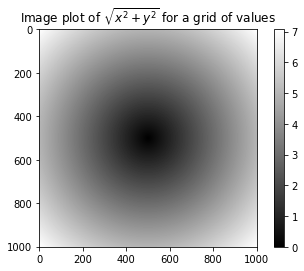

In [ ]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.draw()

[Quiz] 어떤 지역의 고도 z는 경도 x, 위도 y에 대해 다음과 같은 값으로 근사할 수 있다고 하자.
$$z = x^2 - 1.2  x y + 1.5 y$$

이때, x, y위치에 대한 고도를 시각화해보자.

In [ ]:
z = xs**2 - 1.2 * xs * ys + 1.5 * ys
z

array([[-12.5   , -12.5399, -12.5796, ...,  47.1804,  47.3401,  47.5   ],
       [-12.425 , -12.465 , -12.5048, ...,  47.1356,  47.2952,  47.455 ],
       [-12.35  , -12.3901, -12.4301, ...,  47.0909,  47.2503,  47.41  ],
       ...,
       [ 62.35  ,  62.1903,  62.0309, ...,   2.5099,   2.5499,   2.59  ],
       [ 62.425 ,  62.2652,  62.1056, ...,   2.4652,   2.505 ,   2.545 ],
       [ 62.5   ,  62.3401,  62.1804, ...,   2.4204,   2.4601,   2.5   ]])

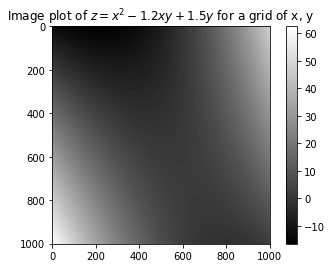

In [ ]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $z = x^2 - 1.2  x y + 1.5 y$ for a grid of x, y")
plt.draw()

### 4.3.1 Expressing conditional logic as array operations
np.where(condition, x, y) 함수는 `x if condition else y`와 같은 3항식의 벡터화된 함수이다.

In [ ]:
import numpy as np
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

위의 방법은 순수 python의 list comprehension을 이용한 반복문으로 배열의 size가 큰 경우에 매우 느리게 동작할 뿐 더러, 배열의 shape이 달라지면(1d array 이상인 경우) 프로그램을 다시 짜야한다.

이에 반해 아래와 같이 추상화된 벡터함수 np.where를 사용하면 array에 대한 메모리 블락에 대해 한번에 연산을 처리하여 수백배 이상 더 빠른 속도를 낼 수 있다.

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
# condition만 제공된 경우 non-zero index를 tuple 형식으로 리턴한다.
np.where(cond)

(array([0, 2, 3], dtype=int64),)

위에서 cond, xarr, yarr의 size는 모두 같았다.

그러나, 아래와 같이 xarr나 yarr 둘 중 하나, 또는 모두가 scalar 이어도 broadcasting에 의해 모두 연산 처리된다.

In [ ]:
from numpy.random import randn
arr = randn(4, 4)
arr

array([[ 1.32048864, -0.02747645,  0.07827931, -0.69506459],
       [-1.54024179, -0.47472154, -1.95204407, -1.19178261],
       [-0.70949934, -0.48157228, -0.33050325,  0.41294847],
       [-0.3348026 ,  0.075276  , -0.19290348, -0.99758356]])

In [ ]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2, -2],
       [-2, -2, -2, -2],
       [-2, -2, -2,  2],
       [-2,  2, -2, -2]])

[Quiz] arr 값에서:
- 그 값의 절대값이 .1보다 작으면 0
- 그렇지 않으면, 양수면 1, 음수면 -1을 리턴하자.

In [ ]:
np.where(np.abs(arr) < .1, 0, np.where(arr > 0, 1, -1))

array([[ 1,  0,  0, -1],
       [-1, -1, -1, -1],
       [-1, -1, -1,  1],
       [-1,  0, -1, -1]])

In [ ]:
tmp = np.where(np.abs(arr) < .1, 0, arr)
tmp = np.where(tmp > 0, 1, tmp)
np.where(tmp < 0, -1, tmp)

array([[ 1.,  0.,  0., -1.],
       [-1., -1., -1., -1.],
       [-1., -1., -1.,  1.],
       [-1.,  0., -1., -1.]])

np.where를 응용하면, 다음과 같이 두가지의 조건의 조합으로 4가지의 다른 배열 연산을 처리할 수도 있다.
- 아래 예는 일종의 함수처럼 활용할 수 있다.
- n은 cond1과 cond2의 boolean을 원소로 하는 size n의 1d list/ array이다.

순수 python으로 구현한 예:

In [ ]:
# original python list implementation example
cond1 = [True, True, False, False]; cond2 = [True, False, True, False]

result = []
for i in range(len(cond1)):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
result

[0, 1, 2, 3]

np.where를 중첩으로 사용하면 위 연산을 :
- 훨씬 더 빠른 속도로 동작하면서도 
- 더 간결한 코딩으로 구현할 수 있다.

numpy array로 구현한 예:

In [ ]:
cond1 = np.array(cond1); cond2 = np.array(cond2)

np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))

array([0, 1, 2, 3])

Boolean type이 산술연산과 만날 때:
- True = 1, False= 0으로 형변환 되므로
- 아래와 같이 가독성이 떨어지지만, 더 간단한 코딩도 가능하다.

---
개념적으로 최대 3점의 벌칙을 줄건데:
- cond1이 참이면 2점을 차감하고
- cond2가 참이면 1점을 차감한다고 생각해보면

In [ ]:
result = 1 * cond1 + 2 * cond2 - 3 * (cond1 | cond2)
result

In [ ]:
result = 3 - (2*cond1 + cond2)
result

[Quiz] 위 산술연산을 고려하여:
- 둘다 참이면 3
- cond1만 참이면 2
- cond2만 참이면 1
- 둘다 거짓이면 0
을 생성해보자.

In [ ]:
2*cond1 + cond2

array([3, 2, 1, 0])

### 4.3.2 Mathematical and statistical methods
ndarray는 전체 또는 특정 축에 대한 기본 통계량을 계산하기 위한 메소드를 제공하고 있다.

<table align="left">
  <tr>
    <th>메소드</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>sum(axis, dtype, out, keepdims)</td>
    <td>주어진 축에 대한 원소의 합을 계산한다.</td>
  </tr>
  <tr>
    <td>mean(axis, dtype, out, keepdims)</td>
    <td>주어진 축에 대한 원소의 평균을 계산한다.</td>
  </tr>
  <tr>
    <td>std/<br>  var(axis, dtype, out, ddof, keepdims)</td>
    <td>주어진 축에 대한 원소의 표준편차/분산을 계산한다.</td>
  </tr>
  <tr>
    <td>min/ max(axis, out)</td>
    <td>주어진 축에 대한 최소/최대 값을 반환한다.</td>
  </tr>
  <tr>
    <td>argmin/ argmax(axis, out)</td>
    <td>주어진 축의 최소/최대 값에 대한 색인을 반환한다.</td>
  </tr>
  <tr>
    <td>cumsum(axis, dtype, out)</td>
    <td>주어진 축에 대한 누적합을 반환한다.</td>
  </tr>
  <tr>
    <td>cumprod(axis, dtype, out)</td>
    <td>주어진 축에 대한 누적곱을 반환한다.</td>
  </tr>
</table>

In [ ]:
# arr = np.random.randn(5,4) # normally-distribued data
arr = np.arange(20).reshape((5,4))
print (arr)
print (arr.mean())
print (np.mean(arr))
print (arr.sum())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]
9.5
9.5
190


mean(axis=n), sum(axis=n) 메소드는 한 차원 낮은 ndarray를 반환한다.
- reduce-like 연산을 수행하면, 해당 축에 대한 차원이 사라진다.

In [ ]:
print (arr.mean(axis=1))
print (arr.sum(0))

[ 1.5  5.5  9.5 13.5 17.5]
[40 45 50 55]


cumsum(axis=n), cumprod(axis=n) 메소드는 동일한 차원의 연산 중간과정 값을 반환한다.

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print (arr.cumsum(0))
print (arr.cumprod(1))

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### 4.3.3 Methods for boolean arrays
boolean의 각 원소의 True는 1로 False는 0으로 산술 연산 처리됨을 확인했다.

In [ ]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

56

boolean ndarray를 위한 all, any 메소드가 있는 데 이는 특정 축의 각 원소에 대한 `&`, `|` 연산의 집계함수로 이해할 수 있다.
- all(axis, out, keepdims): Returns True if all elements evaluate to True.
- any(axis, out, keepdims): Returns True if any of the elements of a evaluate to True.

In [ ]:
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 4.3.4 Sorting
python의 내장 list처럼 ndarray도 sort 메소드로 객체 자체를 정렬할 수 있다.
- sort(axis=-1, kind='quicksort', order=None): Sort an array, in-place.
 - in-place 개념: 메소드를 사용하는 객체 자체를 변환시킨다.
 - in-place 없으면: 변환된 객체를 리턴한다고 보시면 된다.
- argsort(axis=-1, kind='quicksort', order=None): Returns the indices that would sort this array.
 - numpy, scipy, pandas, scikit-learn, pytorch, tensorflow 등에서 arg는 index를 리턴한다는 개념이다.

In [ ]:
arr = randn(8); slic_arr = arr[:2]
arr

array([ 1.25072025, -1.12380922,  1.35366641,  0.96177322,  0.67029774,
        2.91526814,  0.29671026,  0.57186751])

- 연속색인은 View를 리턴하므로, arr가 변경되면 View도 변경된다.

In [ ]:
arr.sort()
arr

array([-1.12380922,  0.29671026,  0.57186751,  0.67029774,  0.96177322,
        1.25072025,  1.35366641,  2.91526814])

In [ ]:
slic_arr

array([-1.12380922,  0.29671026])

위에서 본 바와 같이 <u>sort 메소드는 ndarray 객체 자체를 변환시킨다.</u>
- 이때 새로운 객체를 생성하며, referencing을 달리 하는 것이 아니라
- arr 객체 메모리 블럭에 있는 값을 직접적으로 바꾼다.
- 아래서 slice View인 slic_arr의 값도 같이 바뀌는 결과가 나타난다.

---
2차원 이상의 array에서 축을 지정한 sort
- axis 속성의 default 값이 -1은 마지막 축을 지정한다.
- axis는 크기 비교가 되는 인접 axis의 방향. 또는 순서에 의해 변화될 색인의 축이다.

In [ ]:
arr = randn(5, 3)
arr

array([[ 0.62652658, -1.3883079 ,  0.82109497],
       [-0.70652114, -0.35686071,  0.11943799],
       [-0.59747384, -1.45575417,  0.19993616],
       [ 0.14301922,  1.1097051 ,  0.35246408],
       [ 1.09627959,  0.14390531,  0.88375102]])

In [ ]:
arr.sort()
arr

array([[-1.3883079 ,  0.62652658,  0.82109497],
       [-0.70652114, -0.35686071,  0.11943799],
       [-1.45575417, -0.59747384,  0.19993616],
       [ 0.14301922,  0.35246408,  1.1097051 ],
       [ 0.14390531,  0.88375102,  1.09627959]])

In [ ]:
arr.sort(1)
arr

array([[-1.3883079 ,  0.62652658,  0.82109497],
       [-0.70652114, -0.35686071,  0.11943799],
       [-1.45575417, -0.59747384,  0.19993616],
       [ 0.14301922,  0.35246408,  1.1097051 ],
       [ 0.14390531,  0.88375102,  1.09627959]])

In [ ]:
arr.sort(0)
arr

array([[-1.45575417, -0.59747384,  0.11943799],
       [-1.3883079 , -0.35686071,  0.19993616],
       [-0.70652114,  0.35246408,  0.82109497],
       [ 0.14301922,  0.62652658,  1.09627959],
       [ 0.14390531,  0.88375102,  1.1097051 ]])

[Quiz] 2d 배열 arr에 대해 완전정렬을 수행해보자.
- 좌상단(arr[0,0])이 가장 작고
- 우하단(arr[-1, -1])가 가장 큰 값을 갖도록 정렬해보자.

In [ ]:
arr = arr.reshape(-1)
arr.sort()
arr = arr.reshape((5,3))
arr

array([[-1.45575417, -1.3883079 , -0.70652114],
       [-0.59747384, -0.35686071,  0.11943799],
       [ 0.14301922,  0.14390531,  0.19993616],
       [ 0.35246408,  0.62652658,  0.82109497],
       [ 0.88375102,  1.09627959,  1.1097051 ]])

In [ ]:
from numpy.random import randint
arr = randint(0, 101, (5,3))
arr

array([[21, 17, 43],
       [92, 63, 95],
       [96, 21, 16],
       [11,  8, 12],
       [81, 98, 95]])

[Quiz] 위 배열의 각 열을 과목으로보고, 각 행은 학생이라고 하자.
- 학생별 평균점수로 위 arr를 정렬해보자.
- 위에서는 [11,  8, 12]이 첫 행이 되어야 한다.

In [ ]:
arr[arr.mean(1).argsort()]

array([[11,  8, 12],
       [21, 17, 43],
       [96, 21, 16],
       [92, 63, 95],
       [81, 98, 95]])

아래는 sort 메소드를 활용하여 분위수를 구하는 예인데:
1. arr를 먼저 정렬한다.
2. 분위수에 해당하는 특정 위치에 직접 접근한다.

In [ ]:
large_arr = randn(1000)
large_arr.sort()
# 5백분위수: 정렬할 때 5%에 위치하는 값
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6106385971128165

#### argsort
이번에는 정렬된 index를 반환하는 argsort 메소드를 보자.

In [ ]:
arr = np.array([[1,6,2],
               [5,0,1],
               [4,3,7]])
arr

array([[1, 6, 2],
       [5, 0, 1],
       [4, 3, 7]])

아래와 같이, axis index에 따라 정렬한 후 순서에 대한 색인을 값으로 같는다.

In [ ]:
sort1i = arr.argsort(axis=1)
sort1i

array([[0, 2, 1],
       [1, 2, 0],
       [1, 0, 2]], dtype=int64)

In [ ]:
arr[0][sort1i[0]]

array([1, 2, 6])

In [ ]:
arr.argsort(axis=0)

array([[0, 1, 1],
       [2, 2, 0],
       [1, 0, 2]], dtype=int64)

참고로 numpy.sort(arr, axis=-1, kind='quicksort', order=None) 함수는 
- arr 자체를 변환시키지 않고, 
- 정렬된 arr의 copy를 반환한다.

반면 arr 자체를 반환시키지 않는 argsort메소드와 np.argsort 함수는 동일하다.

---
order 옵션은 field name 또는 colname이 주어진 경우 활용하는 데:
- numpy에서 다루기 보다는 pandas나 scikit-learn에서 다루는 것이 적절하다.
- 보통 dtype과 함께 사용하며, 여기서 간단히 소개하면,
- 지정된 field를 기준으로 정렬을 실시한다.

In [ ]:
dtype = [('name', 'S10'), ('height', float), ('age', int)]
values = [('Arthur', 1.8, 41), ('Lancelot', 1.9, 38),
          ('Galahad', 1.7, 38)]
a = np.array(values, dtype=dtype)
a

In [ ]:
np.sort(a, order='height')

In [ ]:
a.shape

In [ ]:
a.dtype

In [ ]:
a.data

### 4.3.5 Unique and other set logic
numpy는 1d array를 위한 몇가지 집합연산을 위한 함수를 제공한다.

numpy.unique(arr, return_index=False, return_inverse=False, return_counts=False, axis=None):
- 입력 배열에서 유일한 원소를 정렬하여 반환하며, 옵션에 따라 3가지의 배열을 더 반환할 수 있다.
- arr: 유일한 원소를 뽑아낼 입력 배열
- return_index: 출력 배열을 생산할 수 있는 입력 arr의 index 배열
    - 축이 지정되지 않는 경우(None), flattend 1d array를 출력한다.
- return_inverse: 입력 arr를 재생산할 수 있는 출력 arr의 index 배열
- return_counts: 각 유일 원소의 arr에서의 출현 빈도를 나타내는 배열

numpy.intersect1d(ar1, ar2, assume_unique=False):
- 두 1d array의 교집합을 리턴
- assume_unique: 두 입력 arr가 모두 set이라는 가정. 속도를 증가시킨다.

numpy.union1d(ar1, ar2):
- 두 입력 1d array의 합집합을 정렬하여 반환

numpy.in1d(ar1, ar2, assume_unique=False, invert=False):
- ar1원소가 ar2원소를 포함되는 지 여부를 boolean array로 반환. size는 ar1과 동일.
- invert: ar2원소가 ar1원소에 포함되는 지 여부를 boolean array로 반환. size는 ar2와 동일.
    - numpy.in1d(ar1, ar2, invert=True)는 numpy.in1d(ar2, ar1)과 동일.
    
numpy.isin(element, test_elements, assume_unique=False, invert=False):
- element의 각 원소가 flatten된 test_elements에 포함되는 지 여부를 반환. shape은 elemnet와 동일
- in1d의 n 차원으로 확장한 함수

numpy.setdiff1d(ar1, ar2, assume_unique=False);
- ar1 - ar2의 차집합을 정렬하여 반환한다.

numpy.setxor1d(ar1, ar2, assume_unique=False):
- 두 배열의 합집합에서 교집합을 뺀 배열을 정렬하여 반환

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

다양한 옵션들:

In [ ]:
unq, ridx, revr, freq = np.unique(ints, return_index=True, 
                                  return_inverse=True, 
                                  return_counts=True)
unq, ridx, revr, freq

(array([1, 2, 3, 4]),
 array([5, 3, 0, 7], dtype=int64),
 array([2, 2, 2, 1, 1, 0, 0, 3, 3], dtype=int64),
 array([2, 2, 3, 2], dtype=int64))

원 ints 배열을 복구해보자. 작은 값을 여러번 색인하여 많은 값을 생성하기 위해서는 fancy 색인을 주로 이용한다.

In [ ]:
unq[revr]

array([3, 3, 3, 2, 2, 1, 1, 4, 4])

집합연산의 예

In [ ]:
unqNm = sorted(set(names))
unqNm

['Bob', 'Joe', 'Will']

In [ ]:
np.in1d(names, unqNm[:2])

array([ True,  True, False,  True, False,  True,  True])

In [ ]:
np.setdiff1d(names, unqNm[:2])

array(['Will'], dtype='<U4')

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.4. File input and output with arrays
텍스트나 바이너리 데이터를 파일에서 읽거나 쓸 수 있다.

### 4.4.1 Storing arrays on disk in binary format
np.save와 np.load는 압축되지 않는 raw 바이너리 형식으로 .npy 파일에서 ndarray 객체를 저장하거나 읽는다.
- 기본적으로 pickle을 사용하며, python 2와 3에서 모두 호환되도록 저장한다.
- pickle의 dump와 load를 사용하는 것이 일반적이므로, 굳이 알 필요 없다.

In [ ]:
arr = np.arange(10)
np.save('some_array', arr)

In [ ]:
%ls some*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7A6A-2C22

 C:\Users\user\Documents\MLBasic 디렉터리

2021-06-18  오전 11:31               168 some_array.npy
               1개 파일                 168 바이트
               0개 디렉터리  370,631,553,024 바이트 남음


In [ ]:
arr = np.load('some_array.npy')
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.savez 함수를 사용하면, 여러 ndarray를 압축된 형식으로 저장한다.
- 저장하려는 배열은 키워드 인자와 함께 저장하여,
- np.load로 불러올 때 사전 형식으로 객체를 호출하 수 잇다.

In [ ]:
np.savez('array_archive.npz', a=arr, b=names)

In [ ]:
%ls arr*

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7A6A-2C22

 C:\Users\user\Documents\MLBasic 디렉터리

2021-06-18  오전 11:32               642 array_archive.npz
               1개 파일                 642 바이트
               0개 디렉터리  370,631,450,624 바이트 남음


In [ ]:
arch = np.load('array_archive.npz')
arch['b']

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
# !rm some_array.npy
# !rm array_archive.npz
del arch
!del some_array.npy
!del array_archive.npz

### 4.4.2 Saving and loading text files
보통은 pandas의 read_csv 또는 read_table로 텍스트 파일을 읽어 오겠지만, np.loadtxt나 np.getfromtxt를 이용할 경우도 있다.

np.loadtxt는 구분자 지정, 특정 컬럼 변환함수 지정, row skip 등의 기능을 제공한다.

In [ ]:
!type ..\examples\array_ex.txt

In [ ]:
arr = np.loadtxt('../examples/array_ex.txt', delimiter=',')
arr

np.savetxt는 배열을 텍스트 파일로 저장한다.

getfromtxt는 loadtxt와 유사하지만, 구조화된 배열과 누락된 데이터 처리를 위해 설계되었다.

## 4.5 Linear algebra
numpy는 다양한 행렬 연산을 지원하고 있어, 대학 선형대수를 위한 python 교재도 있다.
- 기계학습/ deep learning을 위한 새로운 알로리즘 개발을 위해서는 중요한 내용이다.

<table align="left">
  <tr>
    <th>numpy 함수</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>diag(a)</td>
    <td>정방행렬의 대각요소를 반환하거나, 1d 행렬을 대각화 변환</td>
  </tr>
  <tr>
    <td>dot(a)</td>
    <td>행렬 곱 계산</td>
  </tr>
  <tr>
    <td>trace(a)</td>
    <td>행렬 trace(대각요소의 합)을 계산</td>
  </tr>
  <tr>
    <td>linalg.det(a)</td>
    <td>a의 determinet 계산</td>
  </tr>
  <tr>
    <td>linalg.eig(a)</td>
    <td>정방행렬 a에 대한 고유치와 고유벡터를 계산</td>
  </tr>
  <tr>
    <td>linalg.inv(a)</td>
    <td>a의 역행렬 계산</td>
  </tr>
  <tr>
    <td>linalg.qr(a)</td>
    <td>qr 분해를 계산</td>
  </tr>
  <tr>
    <td>linalg.svd(a)</td>
    <td>Singular Value Decomposition</td>
  </tr>
  <tr>
    <td>linalg.solve(a, b)</td>
    <td>ax = b의 행렬방적의 해</td>
  </tr>
  <tr>
    <td>linalg.lstsq(X, y)</td>
    <td>y = wx를 만족하는 최소제곱 해(w)를 구한다.</td>
  </tr>
</table>


행렬곱 연산은 수학적으로 아래와 같이 정의된다.

$$C_{ij} = (A \cdot B)_{ij} = \sum_{k} A_{ik} B_{kj}$$

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print (x)
print (y)
x.dot(y)  # equivalently np.dot(x, y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [ ]:
np.dot(x, np.identity(3))

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
try: np.dot(x, y.T)
except ValueError as e:
    print (e)

shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)


numpy.linalg에는 행력의 분할과 역행렬, 행렬식 같은 것을 포함한다.

In [ ]:
np.random.seed(12345)

In [ ]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
mat

array([[ 4.07499325, -3.30588372, -1.30731336,  3.44655322,  2.61973938],
       [-3.30588372,  6.15227438,  1.71493621, -4.31933033, -0.09378269],
       [-1.30731336,  1.71493621, 11.11872134, -3.37023945, -2.00972893],
       [ 3.44655322, -4.31933033, -3.37023945,  4.78118413,  0.03314614],
       [ 2.61973938, -0.09378269, -2.00972893,  0.03314614,  7.77364994]])

In [ ]:
inv(mat)

array([[ 3.03609983, -0.1808297 , -0.68779105, -2.82852163, -1.19110946],
       [-0.1808297 ,  0.50346566,  0.12149398,  0.6701624 ,  0.0955664 ],
       [-0.68779105,  0.12149398,  0.29039878,  0.80814474,  0.30488423],
       [-2.82852163,  0.6701624 ,  0.80814474,  3.4151871 ,  1.15567215],
       [-1.19110946,  0.0955664 ,  0.30488423,  1.15567215,  0.60509381]])

In [ ]:
np.set_printoptions(precision=4, suppress=True)
mat.dot(inv(mat))

array([[ 1., -0.,  0.,  0., -0.],
       [-0.,  1., -0.,  0., -0.],
       [ 0., -0.,  1.,  0.,  0.],
       [ 0., -0., -0.,  1.,  0.],
       [ 0., -0., -0., -0.,  1.]])

아래 예제는 선형회귀 등에서 최소제곱법 등에 활용한 QR 분해를 구하는 방법을 나타냈다.
- QR 분해의 자세한 내용은 [위키백과](https://ko.wikipedia.org/wiki/QR_%EB%B6%84%ED%95%B4)를 참고

In [ ]:
q, r = qr(mat)
r

array([[ -6.9271,   7.389 ,   6.1227,  -7.1163,  -4.9215],
       [  0.    ,  -3.9735,  -0.8671,   2.9747,  -5.7402],
       [  0.    ,   0.    , -10.2681,   1.8909,   1.6079],
       [  0.    ,   0.    ,   0.    ,  -1.2996,   3.3577],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.5571]])

## 4.6 Random number generation
다양한 분포의 random 함수를 제공한다.

아래에서 보면 random.normal과 random.randn은 같은 결과를 제공한다.

In [ ]:
np.random.seed(12345)
samples = np.random.normal(size=(4, 4))
np.random.seed(12345)
samples2 = randn(4,4)
print (samples)
print (samples2)

[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]]
[[-0.2047  0.4789 -0.5194 -0.5557]
 [ 1.9658  1.3934  0.0929  0.2817]
 [ 0.769   1.2464  1.0072 -1.2962]
 [ 0.275   0.2289  1.3529  0.8864]]


[Quiz] samples의 평균과 표준편차를 구해보자.

In [ ]:
largeSamples = randn(100,100)
largeSamples.mean(), largeSamples.std()

(-0.011958337098864246, 0.998710950675923)

아래 예에서 보듯이 numpy.random 모듈은 python 내장 random 모듈에 비해 훨씬 더 빠른 sample 추출이 가능하다.

- normalvariate(mu, gamma): 정규분포로 부터 하나의 sample을 추출한다.

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

914 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.8 ms ± 502 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


numpy.random 모듈에 대한 자세한 설명은 pandas에서 정리할 계획이다.

일부 numpy.random 함수:
<table align="left">
  <tr>
    <th>함수</th>
    <th>설명</th>
  </tr>
  <tr>
    <td>seed</td>
    <td>난수 발생 seed를 지정</td>
  </tr>
  <tr>
    <td>permutation </td>
    <td>순서를 임의로 바꾸거나 임의의 순열을 반환</td>
  </tr>
  <tr>
    <td>shuffle </td>
    <td>리스트나 배열의 순서를 뒤섞는다.</td>
  </tr>
  <tr>
    <td>rand </td>
    <td>균등 분포에서 표본을 추출</td>
  </tr>
  <tr>
    <td>randint </td>
    <td>주어진 최소/최대 범위에서 임의 난수 추출</td>
  </tr>
  <tr>
    <td>randn </td>
    <td>표준정규분포에서 표본 추출</td>
  </tr>
  <tr>
    <td>binomial </td>
    <td>이항분포에서 표본 추출</td>
  </tr>
  <tr>
    <td>normal </td>
    <td>정규분포에서 표본 추출</td>
  </tr>
  <tr>
    <td>beta </td>
    <td>베타분포에서 표본 추출</td>
  </tr>
  <tr>
    <td>chisquare </td>
    <td>카이스퀘어 분포에서 표본 추출</td>
  </tr>
  <tr>
    <td>gamma </td>
    <td>감마분포에서 표본 추출</td>
  </tr>
</table>

## 4.7 Example: Random Walks
무작위 계단오르내리기 예제로서, 순서 python으로 작업하면 아래와 같다.

In [ ]:
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
print position

In [ ]:
np.random.seed(12345)

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk[-1]

In [ ]:
walk.min()

In [ ]:
walk.max()

최초로 10 계단 이상 오르내린 시행은 어디일까?

In [ ]:
(np.abs(walk) >= 10).argmax()

In [ ]:
walk[37]

### 4.7.1 Simulating many random walks at once
대량의 random walk 실험을 한번에 빠르게 수행하는 손쉬운 방법이 있다.
- random walk를 수행하는 2d ndarray를 생성하고, 누적합을 구하면 된다.

In [ ]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

In [ ]:
print walks.max()
print walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

In [ ]:
hits30.sum() # Number that hit 30 or -30

최초 30 계단을 오르내린 시점은 언제인가?

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

다음과 같이 다양한 분포로부터 random walk를 생성할 수 있다.

In [ ]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))

[Quiz] A, B 2개반에 각각 10명의 학생이 있습니다.
- 각 학생의 id는 0 ~ 19이고,
- kor, eng, math 점수가 50 ~ 100 사이의 분포합니다.
 - 이 점수를 score라는 numpy array로 (2, 10, 3)의 shape으로 생성한다.
 - 점수는 seed를 123으로 고정하여 randint로 생성한다.
- 각 반별로 kor, eng, math 점수가 최대인 id를 찾아서 출력하라.

```
    kor   eng   math
A    0      3      7
B   18     11     15
```

In [ ]:
np.random.seed(123)
scores = randint(50, 101, (2,10,3))
scores

array([[[95, 52, 78],
        [84, 88, 67],
        [69, 92, 72],
        [83, 82, 99],
        [97, 59, 82],
        [96, 82, 97],
        [75, 69, 64],
        [86, 82, 66],
        [54, 99, 53],
        [52, 70, 89]],

       [[52, 70, 97],
        [98, 57, 91],
        [85, 78, 88],
        [83, 71, 80],
        [77, 84, 83],
        [62, 90, 53],
        [92, 55, 50],
        [61, 84, 60],
        [72, 63, 68],
        [86, 65, 93]]])

In [ ]:
maxA = scores[0].argmax(0)
maxB = scores[1].argmax(0) + 10
maxA, maxB

(array([4, 8, 3], dtype=int64), array([11, 15, 10], dtype=int64))

In [ ]:
scores.argmax(axis=1)

array([[4, 8, 3],
       [1, 5, 0]], dtype=int64)

In [ ]:
scores.argmax(axis=1) + np.array([[0], [10]])

array([[ 4,  8,  3],
       [11, 15, 10]], dtype=int64)

In [ ]:
scores.argmax(axis=1) + np.array([0, 10]).reshape(-1,1)

array([[ 4,  8,  3],
       [11, 15, 10]], dtype=int64)